In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import iqr

In [2]:
train = pd.read_csv('train.csv')
train = train[train.IsOpen != 0]
train = train.drop(columns=['IsOpen'])


 mu = 4890.09 and sigma = 2215.40

Skewness: 1.558774
Kurtosis: 4.691952


Text(0.5,1,'NumberOfSales distribution')

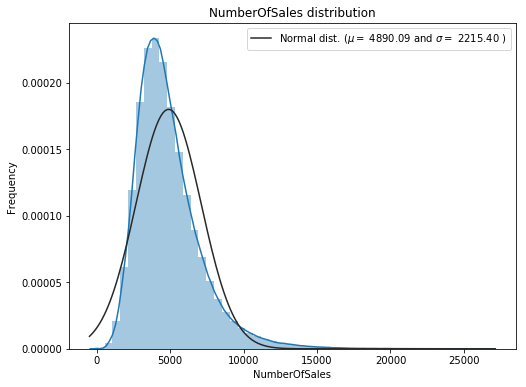

In [3]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
# fit the data with a normal distribution and 
sns.distplot(train['NumberOfSales'] , fit=norm)

# and check the fitted mu and sigma
(mu, sigma) = norm.fit(train['NumberOfSales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % train['NumberOfSales'].skew())
print("Kurtosis: %f" % train['NumberOfSales'].kurt())

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('NumberOfSales distribution')

In [4]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["NumberOfSales"] = np.log1p(train["NumberOfSales"])
(mu, sigma) = norm.fit(train['NumberOfSales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % train['NumberOfSales'].skew())
print("Kurtosis: %f" % train['NumberOfSales'].kurt())


 mu = 8.40 and sigma = 0.44

Skewness: -0.637384
Kurtosis: 10.145847


Text(0.5,1,'NumberOfSales distribution')

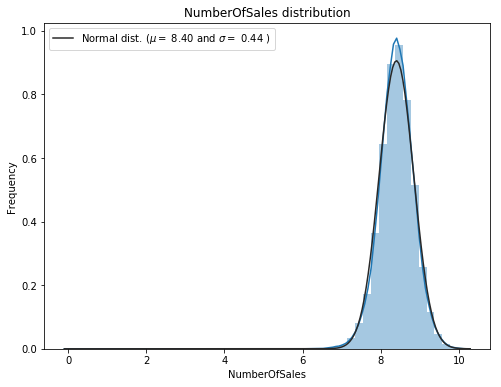

In [5]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
sns.distplot(train['NumberOfSales'] , fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('NumberOfSales distribution')

In [6]:
specificTrain = train[['NearestCompetitor','Region_AreaKM2','Region_GDP','Region_PopulationK','CloudCover','NumberOfSales']]

In [7]:
unknown_per_columns = specificTrain.isnull().sum()
unknown_per_columns

NearestCompetitor         0
Region_AreaKM2            0
Region_GDP                0
Region_PopulationK        0
CloudCover            34057
NumberOfSales             0
dtype: int64

In [8]:
from sklearn.preprocessing import Imputer
numerical_imputer = Imputer(missing_values="NaN",strategy="median", copy=True)
numerical_imputer.fit(specificTrain['CloudCover'].values.reshape(-1, 1))
df_numerical_imputed_array = numerical_imputer.transform(specificTrain['CloudCover'].values.reshape(-1, 1))
df_numerical_imputed = pd.DataFrame(data=df_numerical_imputed_array)
train = train.drop(columns=['CloudCover'])
specificTrain['CloudCover'] = df_numerical_imputed

In [9]:
print('Variable Range')
for f in specificTrain:
    print('%s\t%.3f'%(f,np.max(specificTrain[f]) - np.min(specificTrain[f])))
    
print('\n\nInterquartile Range')
for f in specificTrain:
    print('%s\t%.3f'%(f,iqr(specificTrain[f])))

Variable Range
NearestCompetitor	85023.000
Region_AreaKM2	31877.000
Region_GDP	14038.000
Region_PopulationK	7330.000
CloudCover	8.000
NumberOfSales	10.190


Interquartile Range
NearestCompetitor	8704.000
Region_AreaKM2	8351.000
Region_GDP	4082.000
Region_PopulationK	4434.000
CloudCover	nan
NumberOfSales	0.557


D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


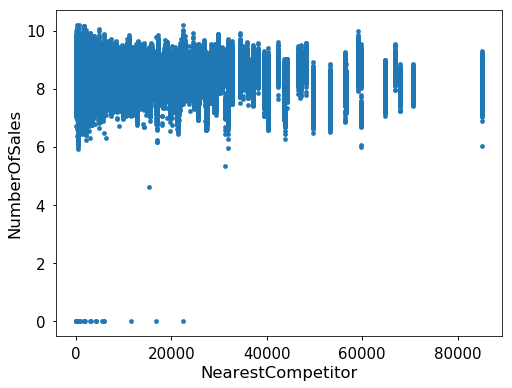

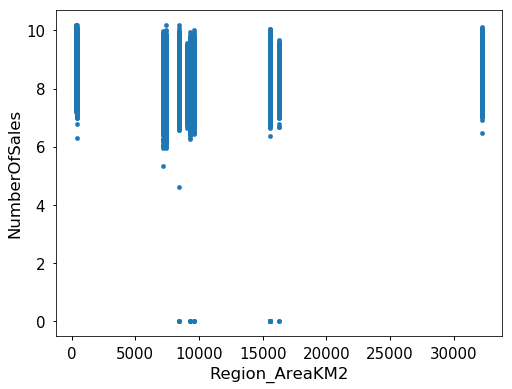

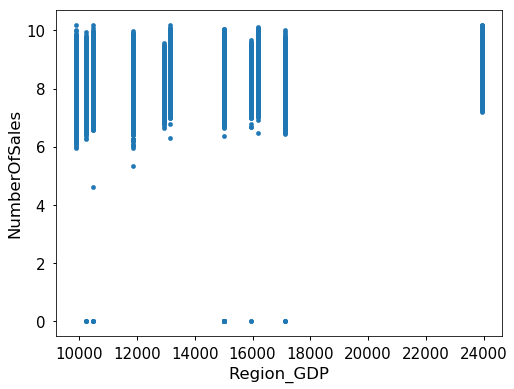

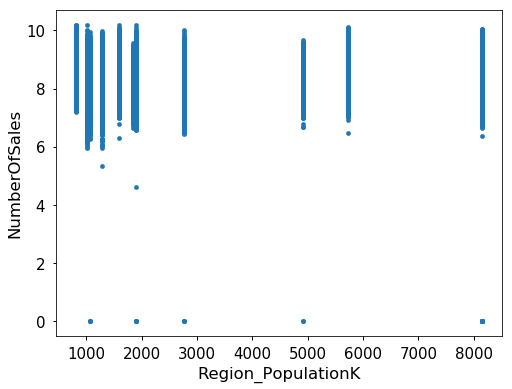

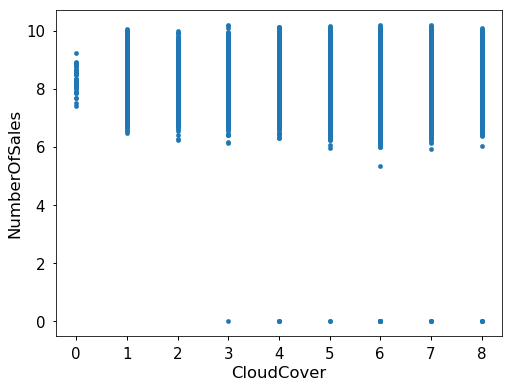

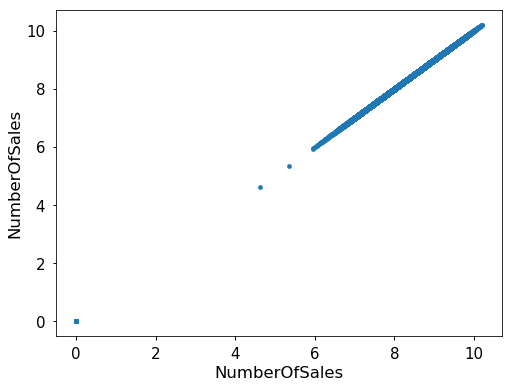

In [10]:
for f in specificTrain:
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    specificTrain.plot(kind="scatter", x=f, y="NumberOfSales")

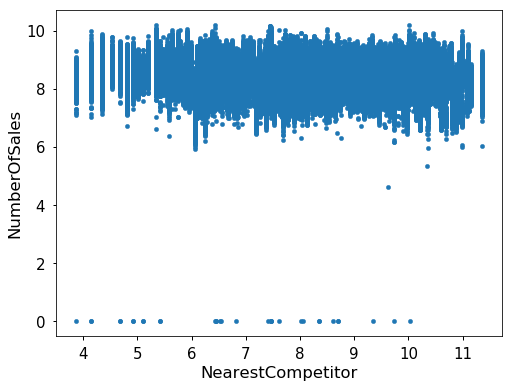

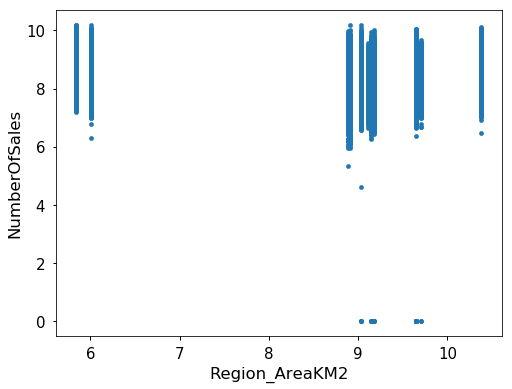

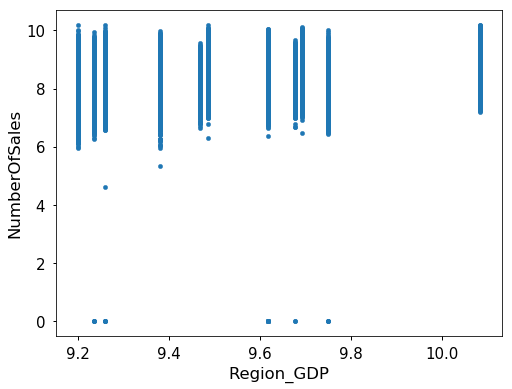

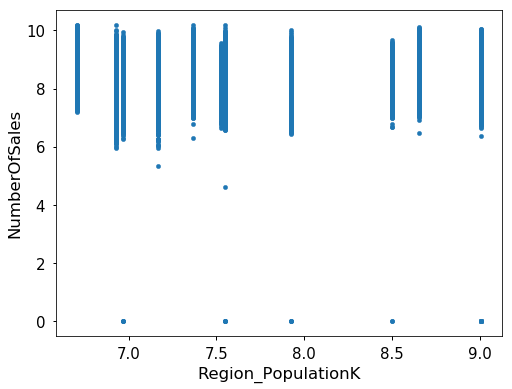

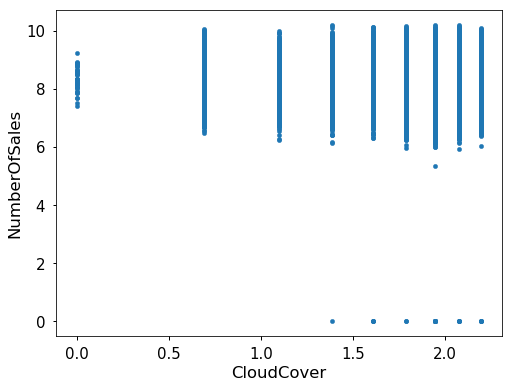

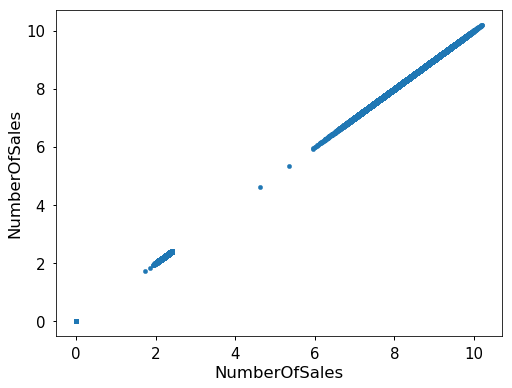

In [11]:
for f in specificTrain:
    list_of_series = [np.log1p(specificTrain[f]), specificTrain["NumberOfSales"]]
    logFeature = pd.concat(list_of_series, axis=1)
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    logFeature.plot(kind="scatter", x=f, y="NumberOfSales")

In [12]:
# no particul kind of correlations found